In [43]:
import tensorflow as tf
#from tensorflow import keras
#from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import SGD
#from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
#from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
#from keras.models import Model
#from keras import backend as K
#from keras.optimizers import SGD
#from keras.layers import Dense, GlobalAveragePooling2D, Input
#from keras.applications.inception_v3 import InceptionV3
#from keras.preprocessing.image import (ImageDataGenerator, Iterator, array_to_img, img_to_array, load_img)
#from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from matplotlib import pyplot
import sys
import numpy as np

In [27]:
# Número de classes
num_classes = 1

# Tamanho do batch
batch_size = 32

# Definindo dimensões da imagem
img_width, img_height = 150, 150

# Definindo esquema de cor
color_mode, color_channels = 'grayscale', 1
# color_mode, color_channels = 'rgb', 3

In [28]:
nb_epochs = 100

In [29]:
# Definindo caminho das imagens D:\Google Drive\ufp\3channel\todas
train_path = r'D:\Downloads\3channel\All'
dataFrame = r'D:\Downloads\Git\Licon-Xray\dataset_csv.csv'

In [30]:
df = pd.read_csv(dataFrame)
df.drop('Unnamed: 0',axis=1,inplace=True)

In [31]:
#Equaliza o numero de classes
df = pd.concat((df[df['Label'] == 'C19'],df[df['Label'] == 'Normal'].sample(3964)),axis=0)

In [32]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255, validation_split=0.3)

In [33]:
train_generator = datagen.flow_from_dataframe(dataframe=df,
                                              directory=train_path,
                                              x_col="Image Index", y_col="Label",
                                              class_mode='binary',
                                              color_mode="grayscale",
                                              subset='training',
                                              target_size=(124, 124), batch_size=32)

Found 3971 validated image filenames belonging to 2 classes.


C:\Users\thiag\miniconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:282: UserWarning: Found 2256 invalid image filename(s) in x_col="Image Index". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [34]:
validation_generator = datagen.flow_from_dataframe(dataframe=df,
                                                   directory=train_path,
                                                   x_col="Image Index", y_col="Label",
                                                   class_mode='binary',
                                                   color_mode="grayscale",
                                                   subset='validation',
                                                   target_size=(124, 124), batch_size=32)

Found 1701 validated image filenames belonging to 2 classes.


C:\Users\thiag\miniconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:282: UserWarning: Found 2256 invalid image filename(s) in x_col="Image Index". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [35]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(124, 124, 1)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(num_classes, activation='sigmoid'))
# compile model
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=["accuracy"])

In [36]:
# fit model
history = model.fit_generator(train_generator, steps_per_epoch=len(train_generator),
                              validation_data=validation_generator, validation_steps=len(validation_generator),
                              epochs=50, verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 125 steps, validate for 54 steps
Epoch 1/50
125/125 [==============================] - 37s 295ms/step - loss: 0.0861 - accuracy: 0.9864 - val_loss: 5.4378 - val_accuracy: 0.0000e+00
Epoch 2/50
125/125 [==============================] - 17s 133ms/step - loss: 0.0401 - accuracy: 0.9935 - val_loss: 4.6400 - val_accuracy: 0.0000e+00
Epoch 3/50
125/125 [==============================] - 17s 134ms/step - loss: 0.0405 - accuracy: 0.9935 - val_loss: 5.3124 - val_accuracy: 0.0000e+00
Epoch 4/50
125/125 [==============================] - 17s 133ms/step - loss: 0.0403 - accuracy: 0.9935 - val_loss: 4.9679 - val_accuracy: 0.0000e+00
Epoch 5/50
125/125 [==============================] - 17s 132ms/step - loss: 0.0394 - accuracy: 0.9935 - val_loss: 6.1547 - val_accuracy: 0.0000e+00
Epoch 6/50
125/125 [==============================] - 17s 132ms/step - loss: 0.0397 - accuracy: 0.9935 - val_loss: 4.6774 - val_accuracy: 0.0000e+00
Epoch 7/50
12

In [37]:
# save model
model.save('model.hdf5', overwrite=True)

In [38]:
loss, accuracy = model.evaluate_generator(validation_generator, steps=len(validation_generator), verbose=0)
print('> loss=%.3f, accuracy=%.3f' % (loss, accuracy))

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
> loss=6.327, accuracy=0.640


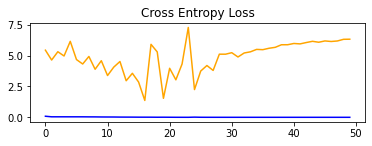

In [39]:
# plot diagnostic learning curves
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')

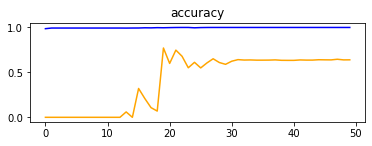

In [40]:
# plot accuracy
pyplot.subplot(212)
pyplot.title('accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

In [41]:
filename = sys.argv[0].split('/')[-1]
pyplot.savefig(filename + '_plot.png')
pyplot.close()

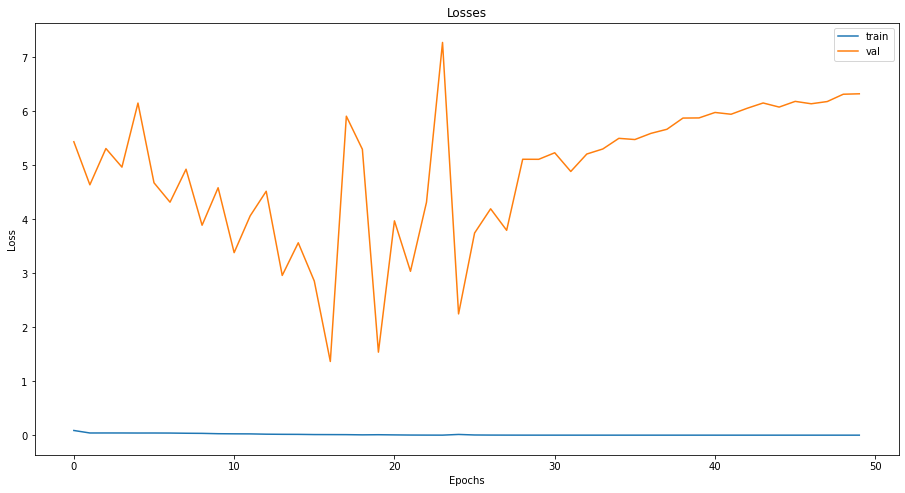

In [46]:
fig = plt.figure(figsize = (12,6))

ax = fig.add_axes([0,0,1,1])

ax.plot(np.arange(0,50),history.history['loss'])
ax.plot(np.arange(0,50),history.history['val_loss'])
ax.set_title('Losses')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend(['train', 'val'])

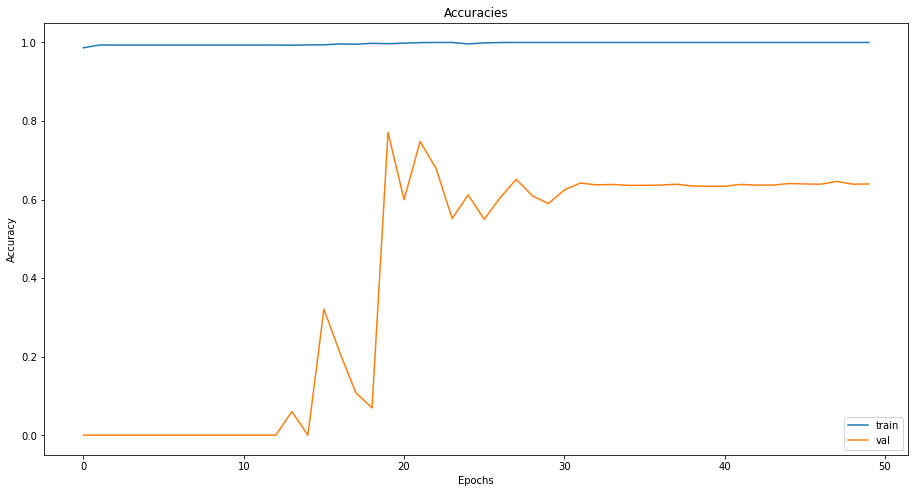

In [47]:
fig = plt.figure(figsize = (12,6))

ax = fig.add_axes([0,0,1,1])

ax.plot(np.arange(0,50),history.history['accuracy'])
ax.plot(np.arange(0,50),history.history['val_accuracy'])
ax.set_title('Accuracies')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend(['train', 'val'])